In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Práctica 4

**Esteban Reyes Saldaña**

Procesamiento del Lenguaje Natural


Práctica 4: DOR

In [ ]:
import os
import re
# buscar
from keras.preprocessing.text import Tokenizer

In [ ]:
def get_texts_from_file (path_corpus, path_truth) :
  tr_txt = []
  tr_y   = []

  with open (path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
    for twitt in f_corpus:
      tr_txt += [twitt]
    for label in f_truth:
      tr_y   += [label]
  return tr_txt, tr_y

In [ ]:
# Ruta para leer desde drive
dir = '/content/drive/MyDrive/CIMAT/Segundo Semestre/Lenguaje Natural/Práctica 3'

In [ ]:
tr_txt, tr_y = get_texts_from_file(dir + '/mex_train.txt', dir + '/mex_train_labels.txt')

In [ ]:
import nltk 
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
corpus_palabras = []
for doc in tr_txt :
  corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [ ]:
# Ordenar  diccionario
def sortfreqDict(freqdict):
  aux = [(freqdict[key], key) for key in freqdict]
  aux.sort()
  aux.reverse()
  return aux

In [ ]:
V = sortfreqDict(fdist)
V[:5000]

[(3383, 'que'),
 (3357, 'de'),
 (2774, '.'),
 (2630, 'a'),
 (2433, 'la'),
 (2266, 'y'),
 (1824, 'no'),
 (1613, 'me'),
 (1505, '!'),
 (1303, 'el'),
 (1263, '@usuario'),
 (1191, 'en'),
 (1148, 'verga'),
 (1079, 'madre'),
 (969, 'se'),
 (895, 'putas'),
 (888, 'los'),
 (867, 'es'),
 (831, 'putos'),
 (786, '?'),
 (770, 'con'),
 (763, 'por'),
 (718, 'mi'),
 (697, 'un'),
 (693, 'te'),
 (683, 'ya'),
 (663, 'si'),
 (652, '"'),
 (644, 'lo'),
 (628, 'las'),
 (566, 'como'),
 (565, 'para'),
 (556, 'loca'),
 (549, 'su'),
 (525, 'tu'),
 (502, 'una'),
 (472, '...'),
 (439, 'pero'),
 (409, 'le'),
 (377, '😂'),
 (359, 'al'),
 (329, 'del'),
 (314, 'más'),
 (303, 'yo'),
 (296, 'pinche'),
 (281, 'cuando'),
 (277, 'puta'),
 (273, 'qué'),
 (263, 'todos'),
 (260, 'o'),
 (259, ':'),
 (250, 'bien'),
 (244, 'son'),
 (241, 'estoy'),
 (240, '¿'),
 (238, 'les'),
 (233, 'hdp'),
 (230, 'porque'),
 (229, 'sus'),
 (218, 'todo'),
 (209, 'joto'),
 (208, 'ni'),
 (199, 'hasta'),
 (198, 'esta'),
 (189, 'está'),
 (183, '…'),


In [ ]:
dict_indices = dict()
count = 0

for wigth, word in V:
  dict_indices[word] = count
  count += 1

# Bow

In [ ]:
import numpy as np

def build_bow_tr(tr_txt, V, dict_indices):
  BOW = np.zeros((len(tr_txt), len(V)), dtype = int)

  cont_doc = 0
  for tr in tr_txt:
    fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))

    for word in fdist_doc:
      if word in dict_indices:
        BOW[cont_doc, dict_indices[word]] = 1
    
    cont_doc += 1
  return BOW

In [ ]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)
print(BOW_tr)

NameError: ignored

# Calculo de DOR

In [ ]:
import math
def compute_dor(TR) :

  TR_subset_in = TR
  
  DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype = np.float)
  print ("DOR: Shape of the input matrix (BoT):", TR.shape)
  print ("DOR: Shape of the term-feat matrix  :", DTR.shape)

  # tamaño del vocabulario en todos los documentos
  tam_V = TR_subset_in.shape[1]

  for doc, i in zip(TR_subset_in, range(len(TR_subset_in))) :
    nonzero_positions = np.nonzero(doc)[0]
    # Tamaño de vocabulario en documento actual
    tam_v = len(nonzero_positions)

    # DTR[nonzero_positions,i] = [(1 + math.log10(doc[term]))* math.log10(tam_V / tam_v) for term in nonzero_positions]
    for term in nonzero_positions :
      DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V / tam_v)

  return DTR 

In [ ]:
from sklearn import preprocessing

DOR_base = compute_dor(BOW_tr)

DOR_base = preprocessing.normalize(DOR_base, norm = 'l2')

DOR: Shape of the input matrix (BoT): (5544, 13523)
DOR: Shape of the term-feat matrix  : (13523, 5544)


In [ ]:
DOR_base

array([[0.01958777, 0.01930128, 0.01974195, ..., 0.        , 0.        ,
        0.        ],
       [0.01926617, 0.        , 0.        , ..., 0.        , 0.        ,
        0.0203207 ],
       [0.        , 0.        , 0.        , ..., 0.02300341, 0.        ,
        0.0224988 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k = 1000)
feats.fit(BOW_tr, tr_y)

SelectKBest(k=1000, score_func=<function chi2 at 0x7fcf3827d488>)

In [ ]:
best = feats.get_support(indices = True)

In [ ]:
best

array([   1,    3,    4,    7,    8,    9,   10,   11,   12,   14,   15,
         16,   18,   22,   27,   30,   32,   33,   34,   35,   37,   39,
         41,   43,   44,   45,   46,   48,   50,   52,   53,   54,   55,
         56,   57,   58,   60,   63,   64,   65,   68,   70,   71,   73,
         75,   77,   80,   82,   85,   86,   88,   90,   96,   97,   99,
        100,  104,  105,  106,  109,  110,  111,  113,  116,  118,  119,
        120,  125,  128,  130,  134,  136,  138,  140,  142,  143,  145,
        146,  147,  149,  155,  156,  157,  159,  166,  168,  173,  174,
        176,  177,  178,  179,  181,  182,  184,  188,  191,  192,  195,
        197,  198,  200,  205,  207,  208,  214,  218,  222,  223,  224,
        226,  227,  228,  229,  231,  235,  236,  237,  240,  242,  249,
        251,  254,  257,  259,  260,  262,  264,  265,  267,  268,  272,
        273,  274,  278,  285,  286,  291,  292,  294,  295,  298,  304,
        308,  311,  312,  315,  318,  320,  323,  3

In [ ]:
dict_indice_invertido = {}
for w in dict_indices:
  dict_indice_invertido[dict_indices[w]] = w

In [ ]:
target_words = [dict_indice_invertido[index] for index in best]

In [ ]:
t_words = target_words

In [ ]:
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])

In [ ]:
target_matrix.shape

NameError: ignored

In [ ]:
# Cargo tsne manualmente desde drive
from importlib.machinery import SourceFileLoader
somemodule = SourceFileLoader('tsne', direction + '/tsne.py').load_module()
from tsne import tsne 

In [ ]:
from tsne import tsne 

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.097992
Iteration 10: error is 17.469340
Iteration 20: error is 17.189558
Iteration 30: error is 16.939735
Iteration 40: error is 17.027132
Iteration 50: error is 16.943251
Iteration 60: error is 16.927550
Iteration 70: error is 16.922225
Iteration 80: error is 16.928679
Iteration 90: error is 16.950000
Iteration 100: error is 16.929304
Iteration 110: error is 2.020606
Iteration 120: error is 1.513981
Iteration 130: error is 1.321857
Iteration 140: error is 1.212488
Iteration 150: error is 1.141195
Iteration 160: error is 1.094356
Iteration 170: error is 1.061290
Iteration 180: error is 1.036266
Iteration 190: error is 1.015977
Iteration 200: error is 0.999570
Iteration 210: error is 0.986020
Iteration 220: error is 0.974812
Iteration 230: error is 0.965353
Iteration 240: error is 0.957329
Iteration 250: error is

In [ ]:
max_x = np.amax(reduced_matrix, axis = 0)[0]
max_y = np.amax(reduced_matrix, axis = 0)[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128405 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128405 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129318 missing from current font.
  font.se

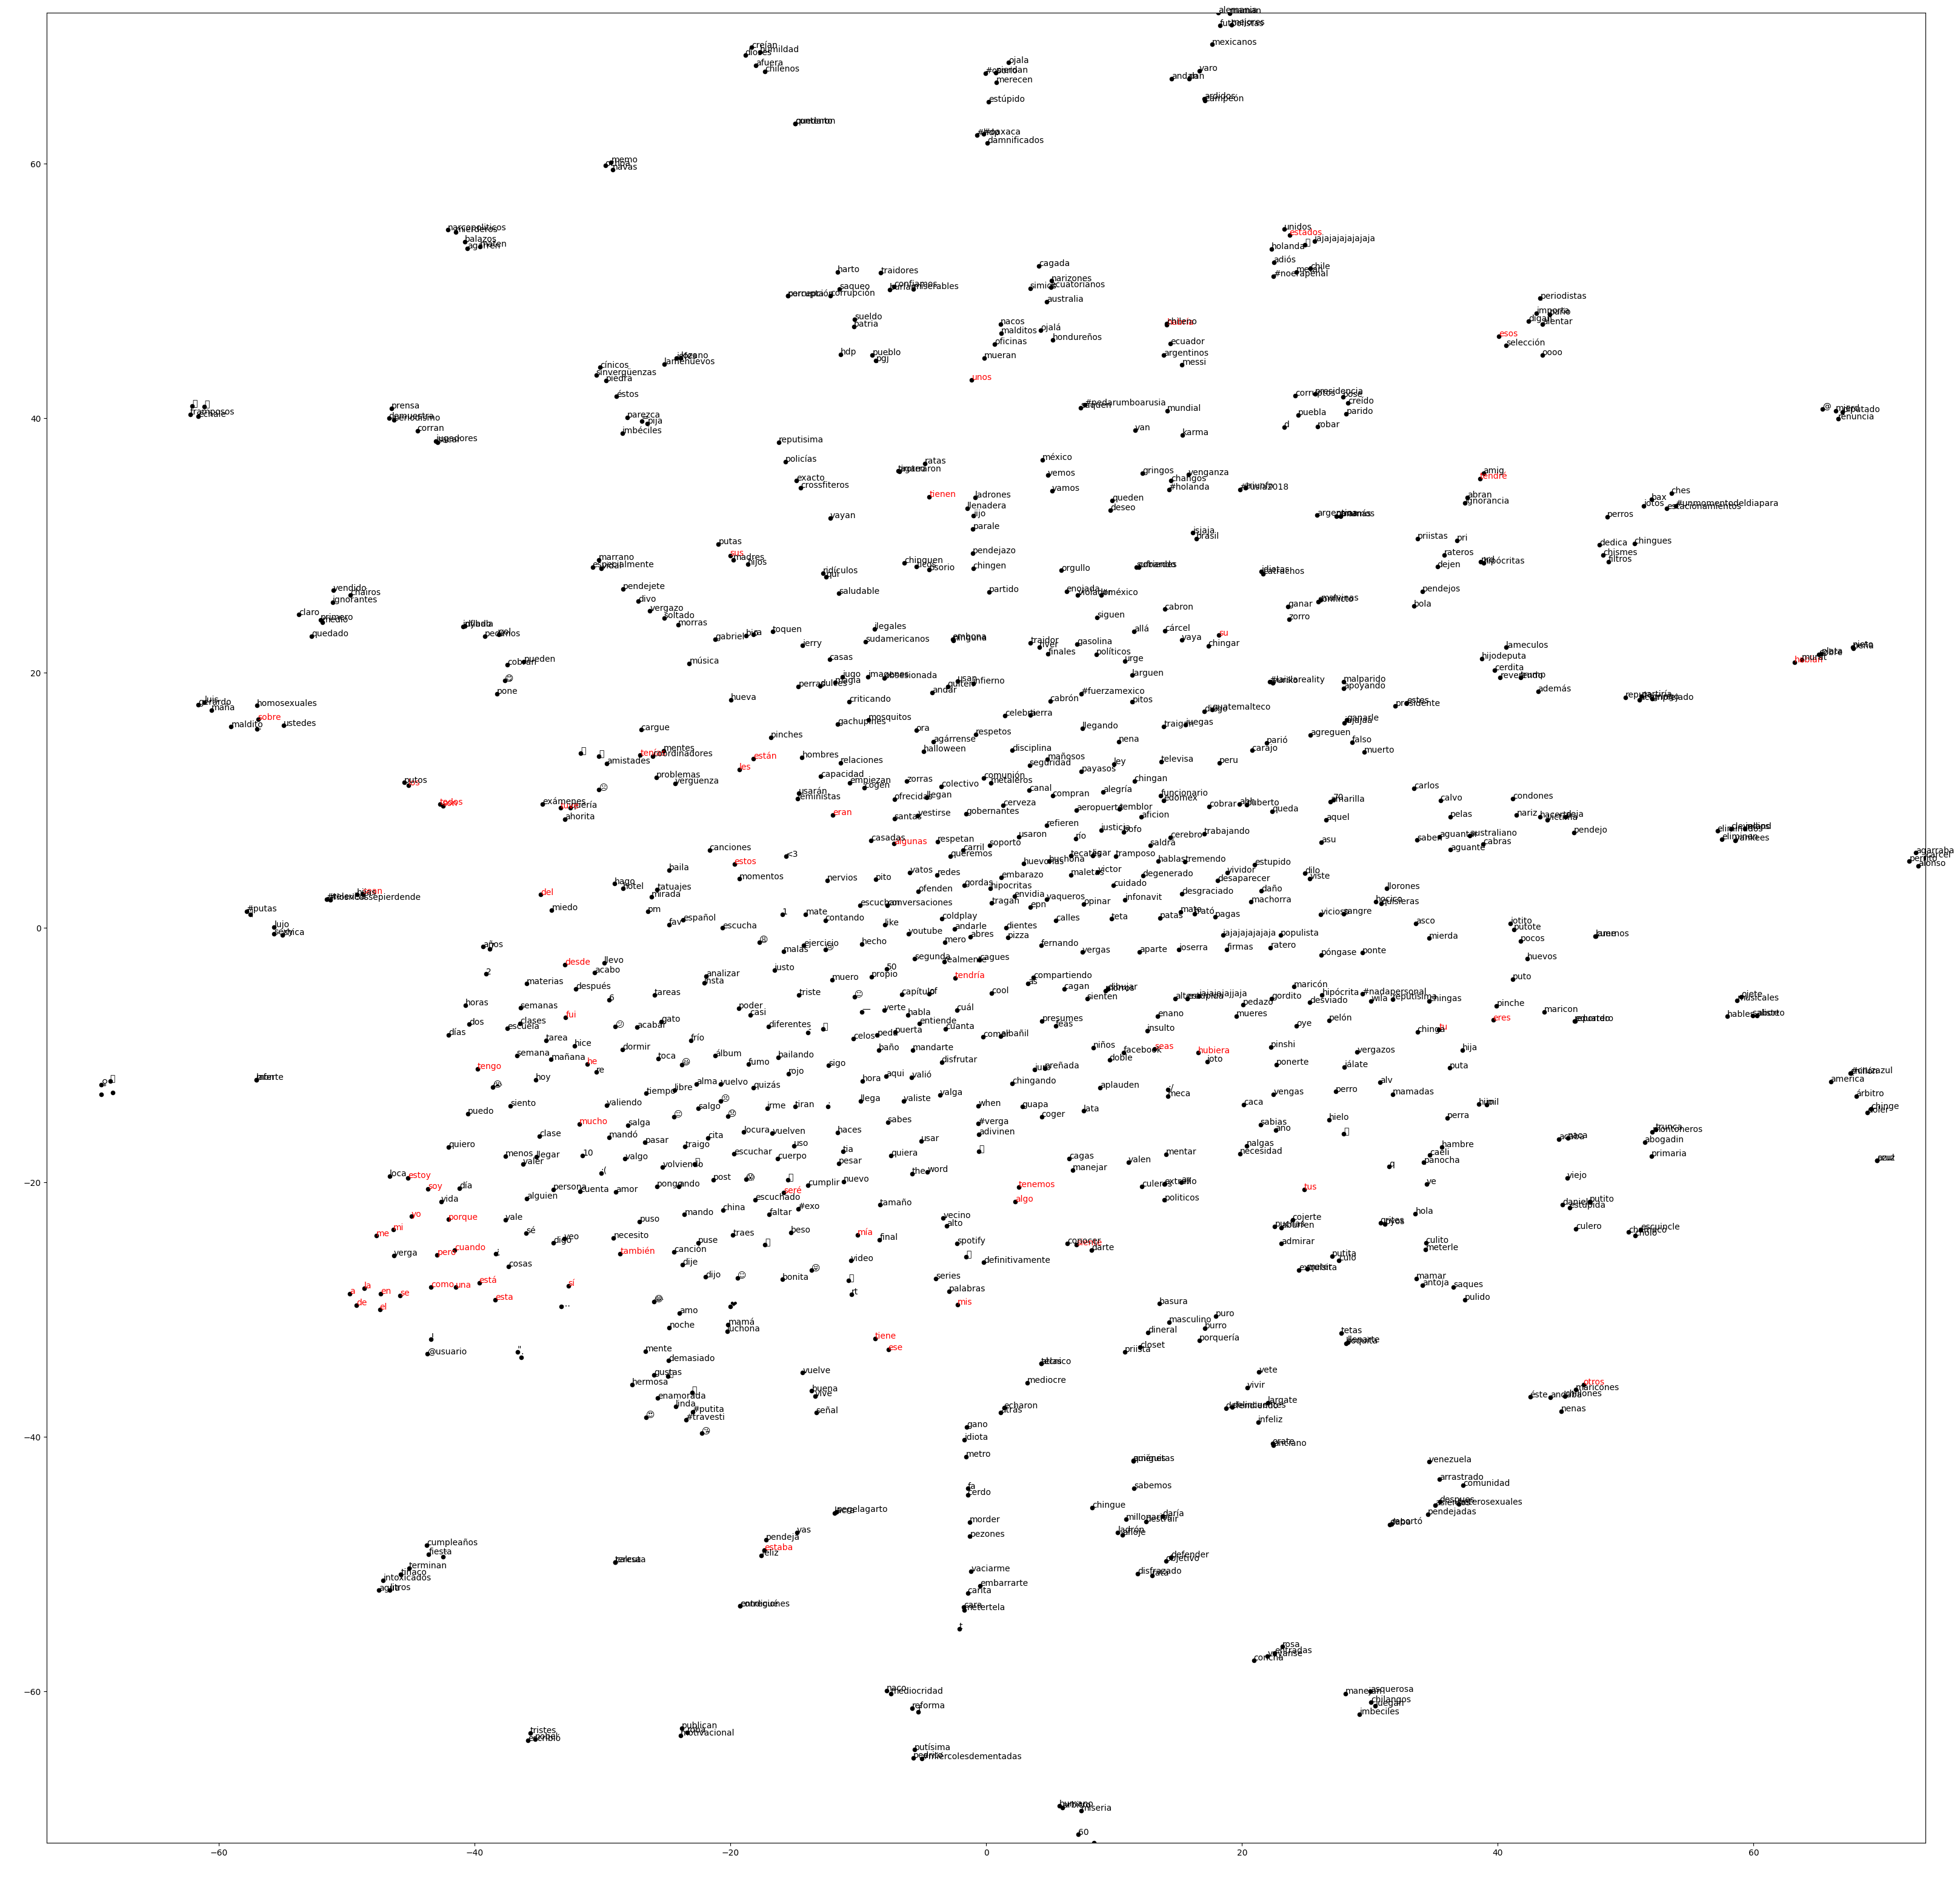

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

from nltk.corpus import stopwords
nltk.download('stopwords')
sw = set(stopwords.words("spanish"))

plt.figure(figsize = (40,40), dpi = 100); plt.xlim((-max_x, max_x)); plt.ylim((-max_y, max_y));
plt.scatter(reduced_matrix[:,0], reduced_matrix[:, 1], 20, color = 'black');

for idx, word in enumerate(t_words[:]):
  x = reduced_matrix[idx, 0]
  y = reduced_matrix[idx, 1]
  if word in sw:
    plt.annotate(word, (x,y), color = 'red')
  else:
    plt.annotate(word, (x,y), color = 'black')

In [ ]:
subsetwords = ["tristes", "triste", "alegría", "hermosa", "chica", "hombres", "hdp", "madre","madres", "@usuario", "hijos", "pendeja", "pendejo", "mierda", "loca", "hijo", "hija", "mamá", "tía" ]

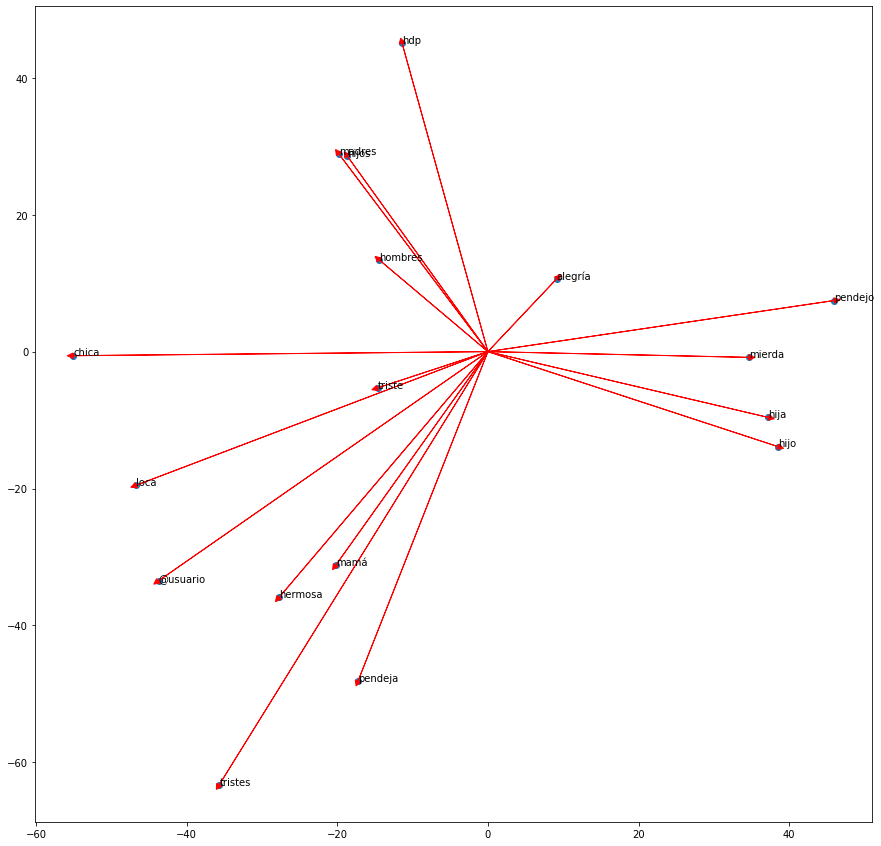

In [ ]:
ploted_subsetwords = []
subreduced_matrix  = []
for idx, word in enumerate(t_words[:]) :
  if word in subsetwords:
    ploted_subsetwords += [word]
    subreduced_matrix += [reduced_matrix[idx]]

subreduced_matrix = np.array(subreduced_matrix)

fig , ax = plt.subplots(figsize = (15, 15))

col1 = 0
col2 = 1

for word in subreduced_matrix:
  ax.arrow(0, 0, word[col1], word[col2], head_width = 0.8, head_length = 0.8, fc = 'r', ec = 'r', width = 1e-2)

ax.scatter(subreduced_matrix[:,col1], subreduced_matrix[:, col2])

for i in range(0, len(ploted_subsetwords)):
  ax.annotate(ploted_subsetwords[i], (subreduced_matrix[i,col1], subreduced_matrix[i, col2]))

plt.show()